<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.2 Text Analysis</h2>

<ul>
    <li>Use <code>TextBlob</code> to analyze words</li>
    <li>Frequency of Words, WordClouds, Spell checking</li>
    <li>Analyze Sentences</li>
    <li>Analyze Sentiments</li>
    <li>Stemming and Lemmatization</li>
</ul>

<h3 style = 'color:lightgreen'>1.2.0 Import Libraries</h3>

In [82]:
from IPython.display import Image
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import pandas as pd

from operator import itemgetter
from wordcloud import WordCloud
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Word

from PIL import Image as Im
import imageio
from matplotlib import pyplot as plt
from datascience import *

import spacy
from textatistic import Textatistic

In [74]:
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('wordnet')

from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...


<h3 style = 'color:lightgreen'>1.2.1 Analysis of Words</h3>

<b>Tokenization</b> refers to segmenting the text into words. Regular Expressions can be used to find tokens, such as 

<ul>
    <li>Words with complex patterns</li>
    <li>Digits</li>
    <li>Sentences</li>
    <li>Regular Expression Patterns</li>
    <li>Unique Words (using 'set' function)</li>
    <li>Search Specific Strings</li>
</ul>

<code>TextBlob</code> can help with - 
<ul>
    <li>Noun-Phrases</li>
    <li>Word Frequencies</li>
    <li>Noun-Phrase Frequencies</li>
    <li>Display top-n used words</li>
    <li>Display top-n used words after removing stop words</li>
    <li>Display Word Clouds</li>
    <li>Spelling mistakes</li>
    <li>Word replacement probabilities</li>
    <li>Parts-of-speech (POS) tagging</li>
    <li>Sentence Count</li>
    <li>Sentence Length</li>
    <li>Display Longest and Shortest Sentence</li>
    <li>Measure Polarity</li>
    <li>Measure Subjectivity</li>
    <li>Measure Sentiments</li>
    <li>Language Detection and Translation</li>
    <li>InflectionL Plurarization and Singularization</li>
    <li>Stemming</li>
    <li>Lemmatization</li>
    <li>nGrams</li>
    <li>Entity Recognition</li>
    <li>Similarity Detection</li>
</ul>


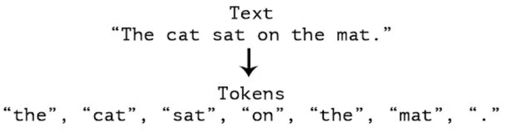

In [3]:
Image("../3. Images/Tokenization.png")

In [4]:
# Create a TextBlob object
textTotal = open("../0. Data/hamlet.txt").read()
print(type(textTotal))
blobTotal = TextBlob(textTotal)

<class 'str'>


In [5]:
blob = TextBlob("This is a lovely spring day.")
blob.words

WordList(['This', 'is', 'a', 'lovely', 'spring', 'day'])

In [6]:
blob.sentences

[Sentence("This is a lovely spring day.")]

In [7]:
numchars = 152
text152 = textTotal[0:numchars + 1]
blob152 = TextBlob(text152)

In [8]:
print(blob152)

The Project Gutenberg eBook of Hamlet, Prince of Denmark
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of 


In [9]:
def print_words(list_words, numElementsRow):
    for j in range(0, len(list_words), numElementsRow):
        for i in range(j, j + numElementsRow):
            if (i >= len(list_words)):
                break
            print(i, '.', list_words[i], end=", ")
        print()
    print()

In [10]:
# Count Words and Noun-Phrases in the text
print(f"Count of Words: {len(blob152.words)}")


Count of Words: 27


In [11]:
print_words(blob152.words, 10)

0 . ﻿The, 1 . Project, 2 . Gutenberg, 3 . eBook, 4 . of, 5 . Hamlet, 6 . Prince, 7 . of, 8 . Denmark, 9 . This, 
10 . ebook, 11 . is, 12 . for, 13 . the, 14 . use, 15 . of, 16 . anyone, 17 . anywhere, 18 . in, 19 . the, 
20 . United, 21 . States, 22 . and, 23 . most, 24 . other, 25 . parts, 26 . of, 



In [12]:
print(f"Count of Noun Phrases: {len(blobTotal.noun_phrases)}")

Count of Noun Phrases: 5702


In [13]:
print(f"Count of Total Words: {len(blobTotal.words)}")

Count of Total Words: 36111


In [14]:
blobTotal.noun_phrases[0:5]

WordList(['project gutenberg', 'hamlet', 'denmark', 'restrictions whatsoever', 'project gutenberg license'])

In [15]:
# Search for words with a specific string

for word in blobTotal.words:
    if 'William' in word:
        print(word)

William
William


In [16]:
# List of stop words

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
print(f"Total Stop Words: {len(stop_words)}")

Total Stop Words: 179


In [18]:
print_words(stop_words, 10)

0 . i, 1 . me, 2 . my, 3 . myself, 4 . we, 5 . our, 6 . ours, 7 . ourselves, 8 . you, 9 . you're, 
10 . you've, 11 . you'll, 12 . you'd, 13 . your, 14 . yours, 15 . yourself, 16 . yourselves, 17 . he, 18 . him, 19 . his, 
20 . himself, 21 . she, 22 . she's, 23 . her, 24 . hers, 25 . herself, 26 . it, 27 . it's, 28 . its, 29 . itself, 
30 . they, 31 . them, 32 . their, 33 . theirs, 34 . themselves, 35 . what, 36 . which, 37 . who, 38 . whom, 39 . this, 
40 . that, 41 . that'll, 42 . these, 43 . those, 44 . am, 45 . is, 46 . are, 47 . was, 48 . were, 49 . be, 
50 . been, 51 . being, 52 . have, 53 . has, 54 . had, 55 . having, 56 . do, 57 . does, 58 . did, 59 . doing, 
60 . a, 61 . an, 62 . the, 63 . and, 64 . but, 65 . if, 66 . or, 67 . because, 68 . as, 69 . until, 
70 . while, 71 . of, 72 . at, 73 . by, 74 . for, 75 . with, 76 . about, 77 . against, 78 . between, 79 . into, 
80 . through, 81 . during, 82 . before, 83 . after, 84 . above, 85 . below, 86 . to, 87 . from, 88 . up, 89 . do

In [19]:
sorted_stop_words = sorted(stop_words, key = itemgetter(0), reverse = False)
print_words(sorted_stop_words, 10)

0 . am, 1 . are, 2 . a, 3 . an, 4 . and, 5 . as, 6 . at, 7 . about, 8 . against, 9 . after, 
10 . above, 11 . again, 12 . all, 13 . any, 14 . ain, 15 . aren, 16 . aren't, 17 . be, 18 . been, 19 . being, 
20 . but, 21 . because, 22 . by, 23 . between, 24 . before, 25 . below, 26 . both, 27 . can, 28 . couldn, 29 . couldn't, 
30 . do, 31 . does, 32 . did, 33 . doing, 34 . during, 35 . down, 36 . don, 37 . don't, 38 . d, 39 . didn, 
40 . didn't, 41 . doesn, 42 . doesn't, 43 . each, 44 . for, 45 . from, 46 . further, 47 . few, 48 . he, 49 . him, 
50 . his, 51 . himself, 52 . her, 53 . hers, 54 . herself, 55 . have, 56 . has, 57 . had, 58 . having, 59 . here, 
60 . how, 61 . hadn, 62 . hadn't, 63 . hasn, 64 . hasn't, 65 . haven, 66 . haven't, 67 . i, 68 . it, 69 . it's, 
70 . its, 71 . itself, 72 . is, 73 . if, 74 . into, 75 . in, 76 . isn, 77 . isn't, 78 . just, 79 . ll, 
80 . me, 81 . my, 82 . myself, 83 . more, 84 . most, 85 . m, 86 . ma, 87 . mightn, 88 . mightn't, 89 . mustn, 
90 . mus

<h3 style = 'color:lightgreen'>1.2.2 NLP Frequency, Word Cloud, Spell Checker, and PoS</h3>

<b>Outline</b>

<ul>
    <li>Measure the frequency of words</li>
    <li>Display most frequently used words</li>
    <li>Elimination of Stop Words from the Word List</li>
    <li>Measure the frequency of noun-phrases</li>
    <li>Create word clouds</li>
    <li>Correct spelling mistakes</li>
    <li>POS Tagging</li>
</ul>

In [20]:
# Measure the frequency of the words
print(f"Number of times the word 'hamlet' appears: {blobTotal.word_counts['hamlet']}")

Number of times the word 'hamlet' appears: 134


In [21]:
dict_unique_words = blobTotal.word_counts.items()
print_words(list(dict_unique_words), 5)

0 . ('\ufeffthe', 1), 1 . ('project', 88), 2 . ('gutenberg', 31), 3 . ('ebook', 13), 4 . ('of', 929), 
5 . ('hamlet', 134), 6 . ('prince', 8), 7 . ('denmark', 31), 8 . ('this', 304), 9 . ('is', 444), 
10 . ('for', 254), 11 . ('the', 1532), 12 . ('use', 29), 13 . ('anyone', 5), 14 . ('anywhere', 2), 
15 . ('in', 530), 16 . ('united', 15), 17 . ('states', 20), 18 . ('and', 884), 19 . ('most', 64), 
20 . ('other', 27), 21 . ('parts', 2), 22 . ('world', 24), 23 . ('at', 110), 24 . ('no', 130), 
25 . ('cost', 4), 26 . ('with', 298), 27 . ('almost', 10), 28 . ('restrictions', 2), 29 . ('whatsoever', 3), 
30 . ('you', 540), 31 . ('may', 80), 32 . ('copy', 12), 33 . ('it', 386), 34 . ('give', 51), 
35 . ('away', 24), 36 . ('or', 236), 37 . ('re-use', 2), 38 . ('under', 15), 39 . ('terms', 25), 
40 . ('license', 17), 41 . ('included', 3), 42 . ('online', 6), 43 . ('www.gutenberg.org', 5), 44 . ('if', 122), 
45 . ('are', 143), 46 . ('not', 328), 47 . ('located', 7), 48 . ('will', 140), 49 . ('ha

In [22]:
print(f"Total number of unique words in the text: {len(dict_unique_words)}")
print(f"Total number of total words in the text: {len(blobTotal.words)}")

Total number of unique words in the text: 5794
Total number of total words in the text: 36111


In [23]:
# Top-10 words in the text
sorted_items = sorted(list(dict_unique_words), key = itemgetter(1), reverse = True)
numberTopWords = 10
top10words = sorted_items[0:numberTopWords]
df = pd.DataFrame(top10words, columns = ['Word', 'Frequency'])
df

,Word,Frequency
0,the,1532
1,of,929
2,to,888
3,and,884
4,a,681
5,you,540
6,in,530
7,i,491
8,footnote,480
9,is,444


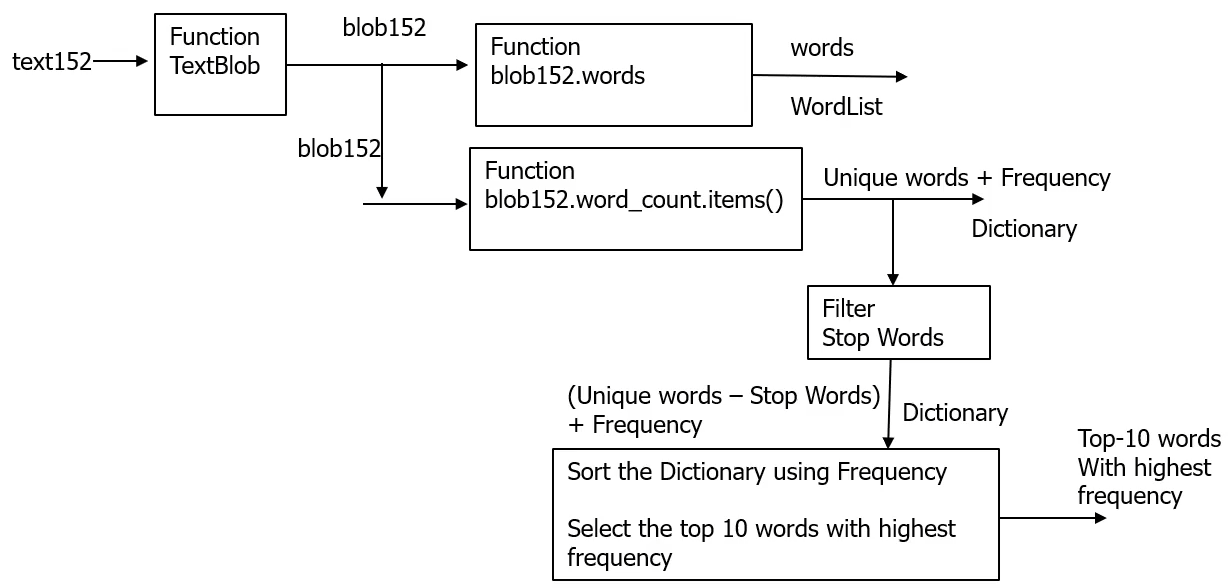

In [24]:
Image("../3. Images/Word Frequency.png")

In [25]:
# Elimitate stop words
list_uniqueword_no_stopwords = []
for _ in dict_unique_words:
    if _[0] not in stop_words:
        list_uniqueword_no_stopwords.append(_)

print(len(list_uniqueword_no_stopwords))

5666


In [26]:
list_uniqueword_no_stopwords[0:10]

[('\ufeffthe', 1),
 ('project', 88),
 ('gutenberg', 31),
 ('ebook', 13),
 ('hamlet', 134),
 ('prince', 8),
 ('denmark', 31),
 ('use', 29),
 ('anyone', 5),
 ('anywhere', 2)]

In [27]:
# Top-10 words in the text
sorted_items = sorted(list(list_uniqueword_no_stopwords), key = itemgetter(1), reverse = True)
numberTopWords = 10
top10words = sorted_items[0:numberTopWords]
df = pd.DataFrame(top10words, columns = ['Word', 'Frequency'])
df

,Word,Frequency
0,footnote,480
1,ham,280
2,king,168
3,lord,159
4,i.e,137
5,hamlet,134
6,queen,113
7,shall,108
8,project,88
9,come,87


In [28]:
df.drop(df.index[0], inplace = True)
df

,Word,Frequency
1,ham,280
2,king,168
3,lord,159
4,i.e,137
5,hamlet,134
6,queen,113
7,shall,108
8,project,88
9,come,87


In [29]:
df.drop(df.index[3], inplace = True)
df

,Word,Frequency
1,ham,280
2,king,168
3,lord,159
5,hamlet,134
6,queen,113
7,shall,108
8,project,88
9,come,87


In [30]:
# Count Noun Phrases
dict_noun_phrases = blobTotal.np_counts.items()
list_noun_phrases = list(dict_noun_phrases)
print(len(list_noun_phrases))

3350


In [31]:
list_noun_phrases[:10]

[('project gutenberg', 13),
 ('hamlet', 120),
 ('denmark', 23),
 ('restrictions whatsoever', 2),
 ('project gutenberg license', 2),
 ('title', 1),
 ('denmark author', 1),
 ('william shakespeare editor', 1),
 ('charles john kean release', 1),
 ('january', 3)]

In [32]:
print(f"Total Noun Phrases: {len(list_noun_phrases)}")
print(f"Unique Noun Phrases: {len(blobTotal.np_counts)}")

Total Noun Phrases: 3350
Unique Noun Phrases: 3350


In [33]:
# Top-10 noun-phrases in the text
dictionary_noun_phrases = blobTotal.np_counts
dict_python = dict(dictionary_noun_phrases)
sorted_items = sorted(dictionary_noun_phrases, key = dictionary_noun_phrases.get, reverse = True)
print(sorted_items)

['] [', 'hamlet', 'r.', 'horatio', '] _i.e._', '_ ]', 'l.h', 'r.h.', 'project gutenberg™', 'l.', 'laertes', 'c.', 'ophelia', '[ _exit_', 'polonius', 'clo._', 'shakespeare', 'queen', 'guildenstern', '] _ham._', 'rosencrantz', 'denmark', 'heaven', 'king', 'r.c', 'nay', 'ghost', '[ _exeunt_', 'ay', '_ ] _i.e._', 'your', 'marcellus', '] _enter_', 'be', 'electronic works', 'england', 'have', 'l.c', 'project gutenberg', '[ _crosses to_', 'upon', 'who', '] _pol._', 'project gutenberg literary archive', "'s time", 'electronic work', 'bernardo', 'good night', 'thou', 'johnson', 'gertrude', '] _king._', 'l.h.u.e', 'speak', 'attendants', 'sir', 'will', 'project gutenberg™ license', '_crosses to_', 'farewell', '] _laer._', '_ham._ o', 'c._ ]', 'u.s.', 'dane', '] _hor._', '] _queen._', 'god', '[ _to_', 'hold', 'till', 'king._', 'play._', 'pyrrhus', 'whose', 'osric', 'english', 'elsinore', 'well', 'say', 'ladies', 'wittenberg', 'madam', "o n't", 'good lord', '] _oph._', 'hath', 'alas', 'thy', 'may',

In [34]:
for i in range(0, 10):
    key = sorted_items[i]
    value = dict_python[key]
    print(key.capitalize(), " - ",  value) # You can also use key.title()

] [  -  459
Hamlet  -  120
R.  -  73
Horatio  -  56
] _i.e._  -  56
_ ]  -  51
L.h  -  48
R.h.  -  48
Project gutenberg™  -  46
L.  -  44


In [35]:
# Create Word Cloud
# - Upload Mask File
mask_heart = imageio.imread(str("../3. Images/Masks/mask_heart.png"))
#vwordcloud = WordCloud(background_color = "white", mask = mask_heart, contour_width = 3, contour_color = 'steelblue')
wordcloud = WordCloud(background_color = "white", mask = mask_heart)
wordcloudImage = wordcloud.generate(textTotal)
print(type(wordcloudImage))

C:\Users\Owner\AppData\Local\Temp\ipykernel_31916\1941989313.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_heart = imageio.imread(str("../3. Images/Masks/mask_heart.png"))


<class 'wordcloud.wordcloud.WordCloud'>


In [36]:
wordcloudFile = wordcloudImage.to_file("hamlet.png")
wordcloudImage.to_image

<bound method WordCloud.to_image of <wordcloud.wordcloud.WordCloud object at 0x000001EB59E93250>>

In [37]:
im_ = Im.open("hamlet.png")
fix, ax = plt.subplots(figsize = (5, 5))
ax.imshow(im_)

In [38]:
# Spell Checker
spelling_error = TextBlob("I havv goood speling!")
spelling_error.correct()

TextBlob("I have good spelling!")

In [39]:
# Finding the probability of a word being misspelled
from textblob import Word
w = Word('This')
w.spellcheck()

[('His', 0.7117826487905228), ('This', 0.28821735120947717)]

In [40]:
w = Word('Spellinggs')
w.spellcheck()

[('Spellinggs', 0.0)]

In [41]:
# PoS Tagging
blob = TextBlob("It is a lovely fall day. Tomorrow looks like fires in Orange County")
blob.tags

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('lovely', 'JJ'),
 ('fall', 'NN'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('fires', 'NNS'),
 ('in', 'IN'),
 ('Orange', 'NNP'),
 ('County', 'NNP')]

<h3 style = 'color:lightgreen'>1.2.3 Analysis of Sentences</h3>

In [42]:
# Count number of sentences
print(f"Number of sentences: {len(blobTotal.sentences)}")

Number of sentences: 2219


In [43]:
# Calculate the length of each sentence
shortSentenceBlob = TextBlob("It is a lovely fall day.")
print(f"Number of Words: {len(shortSentenceBlob.words)}")

Number of Words: 6


In [44]:
for _ in shortSentenceBlob.sentences:
    print(f"Number of Characters: {len(_)}")

Number of Characters: 24


In [45]:
# Count sentences greater than a 280 characters
numChars = 280
count = 0

for _ in blobTotal.sentences:
    if len(_) > numChars:
        count += 1

print(f"Number of sentences greater than {numChars} characters: {count}")

Number of sentences greater than 280 characters: 104


In [46]:
# Display and count sentences containing a specific word

strCh1 = "Hamlet"
strCh2 = "Ophelia"

count = 0

for _ in blobTotal.sentences:
    if strCh1 in _ and strCh2 in _:
        print(_)
        count += 1

print(f"Number of sentences containing {strCh1} and {strCh2}: {count}")

[Footnote II.27: _For if the sun breed maggots in a dead dog,
    being a god, kissing carrion,----Have you a daughter?_] _i.e._,
    Hamlet having just remarked that honesty is very rare in the
    world, adds, that since there is so little virtue, since
    corruption abounds everywhere, and maggots are _bred_ by the sun,
    which is a god, even in a dead dog, Polonius ought to take care
    to prevent his daughter from walking in the sun, lest she should
    prove _"a breeder of sinners;"_ for though _conception_
    (understanding) in general be a blessing, yet as Ophelia might
    chance to _conceive_ (to be pregnant), it might be a calamity.
[_Exeunt_ ROSENCRANTZ _and_ GUILDENSTERN, R.H.]

  _King._                Sweet Gertrude, leave us too;
  For we have closely sent[4] for Hamlet hither,
  That he, as 'twere by accident, may here
  Affront Ophelia:[5]
  Her father and myself (lawful espials[6]),
  Will so bestow ourselves, that, seeing, unseen,
  We may of their encounter fr

In [47]:
strCh3 = "Queen"

count = 0
countsentenceword = 0

for _ in blobTotal.sentences:
    countsentenceword += 1
    if strCh3 in _:
        print(_)
        count += 1

print(f"Number of sentences containing {strCh3}: {count}")

GERTRUDE (_Queen of Denmark, and_
    _mother of Hamlet_)                 Mrs. CHARLES KEAN.
[32]

  _Queen._(L.C.)
_Queen._                          If it be,
  Why seems it so particular with thee?
_Queen._ Let not thy mother lose her prayers, Hamlet:
  I pray thee, stay with us; go not to Wittenberg.
_Queen._ (R.C.)
_Queen._ I do beseech you instantly to visit
  My too much changèd son.
_Queen._ (R.C.)
Thus:

    _In her excellent white bosom,[13] these_, &c.[14]

  _Queen._ Came this from Hamlet to her?
_Queen._ It may be, very likely.
_Queen._          So he does, indeed.
_Queen._ But, look, where sadly the poor wretch comes reading.
[Footnote II.12: _Most beautified Ophelia_,] Heywood, in his
    History of Edward VI., says "Katharine Parre, Queen Dowager to
    King Henry VIII., was a woman _beautified_ with many excellent
    virtues."
[Footnote II.26: _You are a fishmonger._] This was an expression
    better understood in Shakespeare's time than at present, and no
    doubt w

In [48]:
# Display 10 longest and 10 shortest sentences

list_length = []

for _ in blobTotal.sentences:
    list_length.append(len(_))

t1 = Table().with_column('Sentence', blobTotal.sentences).with_column('Length', list_length)

# Longest Sentence
t1.sort('Length', descending = True).show(10)

Sentence,Length
methinks I scent the morning air; Brief let me be.--Sl ...,716
INDEMNITY - You agree to indemnify and hold the Foundati ...,675
[Footnote II.27: _For if the sun breed maggots in a dead ...,656
[Footnote I.118: _There's ne'er a villain dwellin ...,649
"Title: Hamlet, Prince of Denmark Author: William Shake ...",607
"But come;-- Here, as before, never, so help you mercy, ...",595
"Give me that man That is not passion's slave, and I wi ...",574
"perchance to dream: ay, there's the rub; For in that s ...",541
"The following sentence, with active links to, or other i ...",535
But that I am forbid To tell the secrets of my prison- ...,525


In [49]:
# Shortest Sentence

t1.sort('Length', descending = False).show(10)

Sentence,Length
_P.,3
_P.,3
_P.,3
_P.,3
_P.,3
Ho!,3
fye!,4
pah!,4
1.B.,4
1.C.,4


<h3 style = 'color:lightgreen'>1.2.4 Sentiment Analysis, nGrams, and spaCy</h3>

<b>Sentiment Analysis</b> is defined by the following:

1. Polarity of the text (Positive, Negative, or Neutral)
2. Subjectivity of the text (Factual or Non-Factual)

<ul>
    <li>Naive Bayes Sentiment Analyzer</li>
    <li>Language Detection and Translation</li>
    <li>Inflection: Pluralization and Singularization</li>
    <li>Semantics using nGrams</li>
    <li>Entity Recognition using <code>spaCy</code></li>
    <li>Similarity Detection using <code>spaCy</code></li>    
</ul>

<b>Polarity</b> is a relationship between two opposite characteristics or tendencies, like the polarity of two sides of a debate. Polarity is a floating point number which lies in the range of [-1, 1]. Subjective sentences generally refer to - 

1. Personal opinion
2. Emotion
3. Judgment

Objective sentences refer to factual information. Subjectivity is a floating-point number which lies in the range of [0, 1].

In [50]:
# Sentiment Analysis
blob = TextBlob("It is a lovely fall day.")
print(f"Sentiment: {blob.sentiment}")
print(f"Subjectivity: {blob.subjectivity}") #[0, 1] (1 is very objective)
print(f"Polarity: {blob.polarity}") #[-1, 1]

Sentiment: Sentiment(polarity=0.5, subjectivity=0.75)
Subjectivity: 0.75
Polarity: 0.5


In [51]:
# Sentiment Analysis
blob = TextBlob("It is a lovely Python.")
print(f"Sentiment: {blob.sentiment}")
print(f"Subjectivity: {blob.subjectivity}") #[0, 1] (1 is very objective)
print(f"Polarity: {blob.polarity}") #[-1, 1]

Sentiment: Sentiment(polarity=0.5, subjectivity=0.75)
Subjectivity: 0.75
Polarity: 0.5


In [52]:
# Sentiment Analysis
blob = TextBlob("I hate my computer when it crashes.")
print(f"Sentiment: {blob.sentiment}")
print(f"Subjectivity: {blob.subjectivity}") #[0, 1] (1 is very objective)
print(f"Polarity: {blob.polarity}") #[-1, 1]

Sentiment: Sentiment(polarity=-0.8, subjectivity=0.9)
Subjectivity: 0.9
Polarity: -0.8


In [53]:
# Sentiment Analysis
blob = TextBlob("Today is a very lovely day. Tomorrow looks like bad weather.")

for _ in blob.sentences:
    print(f"Sentiment: {_.sentiment}")

Sentiment: Sentiment(polarity=0.65, subjectivity=0.9750000000000001)
Sentiment: Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [54]:
# Display top 3 sentences with Highest Polarity in Hamlet

list_polarity = []

for _ in blobTotal.sentences:
    list_polarity.append(_.polarity)

t1 = Table().with_column('Sentence', blobTotal.sentences).with_column('Polarity', list_polarity)
t1.sort('Polarity', descending = True).show(3)

Sentence,Polarity
"_Ham._ I shall in all my best obey you, madam.",1
"_Ham._ (C.) O, wonderful!",1
time be thine; And thy best graces spend it at thy ...,1


In [55]:
# Lowest Polarity

t1.sort('Polarity', descending = False).show(3)

Sentence,Polarity
"_Ham._ O, horrible!",-1
"O, horrible!",-1
"Why, I should take it: for it cannot be But I am pigeo ...",-1


In [56]:
# Sentiment Analysis using Naive Bayes Classifier
text = "Today is a very lovely day. Tomorrow looks like bad weather."
blob5 = TextBlob(text, analyzer = NaiveBayesAnalyzer())

print('Blob = ', blob5)
print()
print('Sentiment = ', blob5.sentiment)

Blob =  Today is a very lovely day. Tomorrow looks like bad weather.

Sentiment =  Sentiment(classification='neg', p_pos=0.45653406730843027, p_neg=0.5434659326915696)


In [57]:
# Language Detection
blob5 = TextBlob(text)
try:
    blob5.detect_language()
except:
    pass

In [58]:
try:
    spanish_text = str(blob5.translate(to='es'))
    print(spanish_text) #.strip())
except:
    pass

In [59]:
cacti = Word("cacti")
print(f"Singular of cacti: {cacti.singularize()}")

Singular of cacti: cactus


In [60]:
index = Word("index")
print(f"Plural of index: {index.pluralize()}")

Plural of index: indices


In [61]:
animals = TextBlob("dog cat fish bird").words
print(f"Plural of animals: {[w.pluralize() for w in animals]}")

Plural of animals: ['dogs', 'cats', 'fish', 'birds']


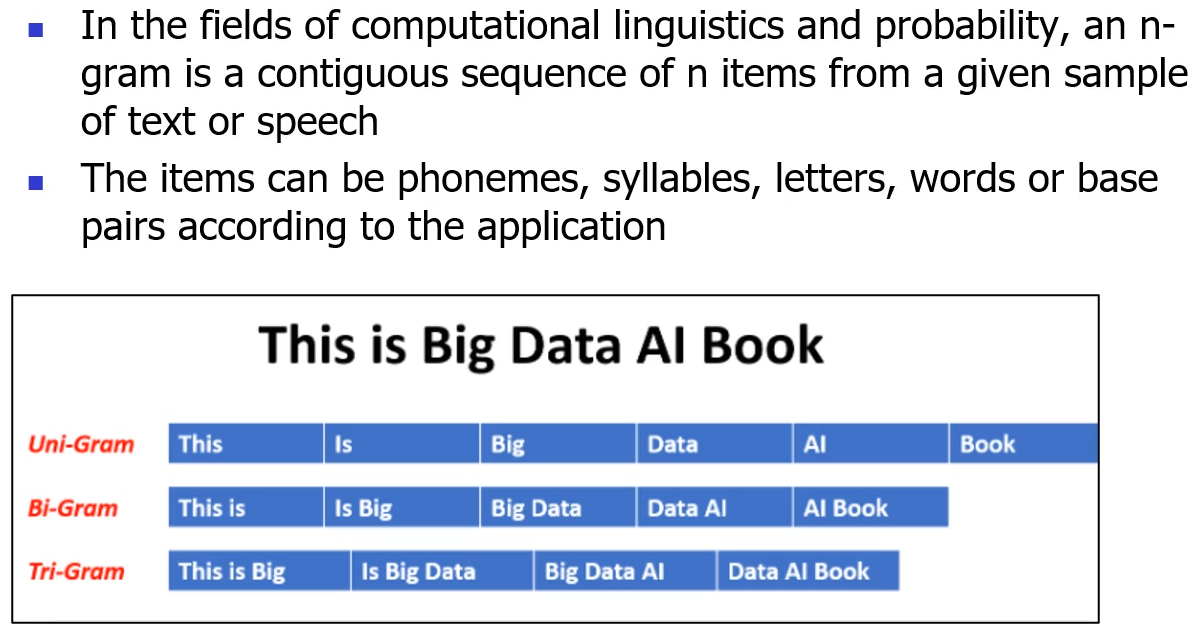

In [62]:
Image("../3. Images/NGrams.png")

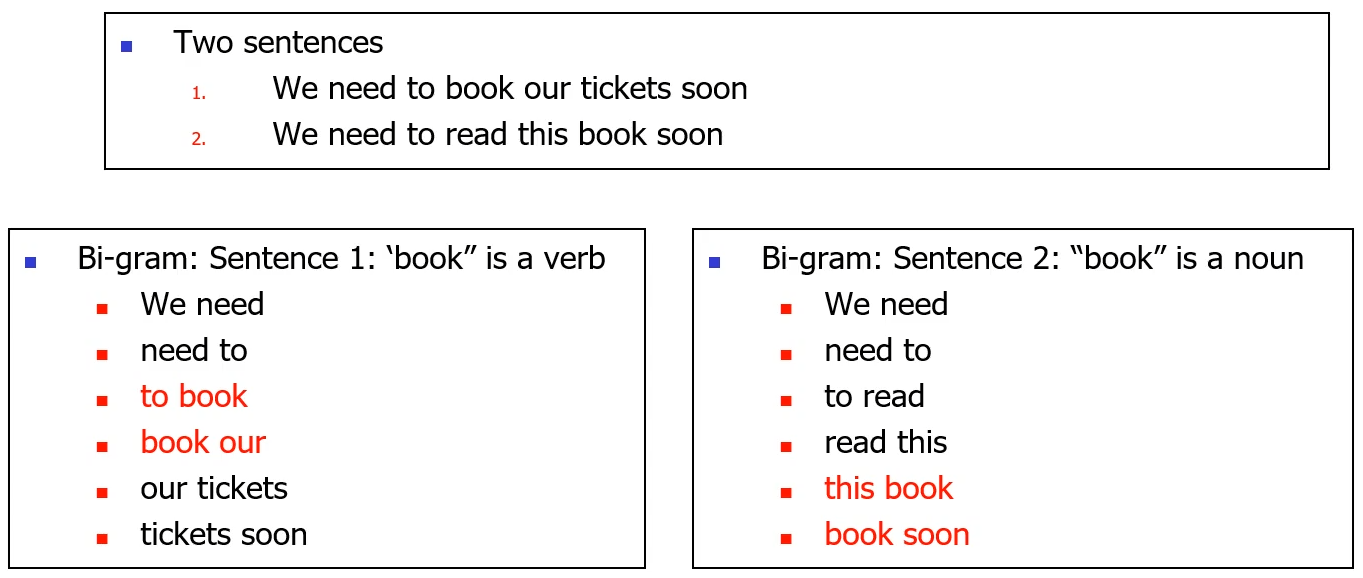

In [63]:
Image("../3. Images/Bigrams.png")

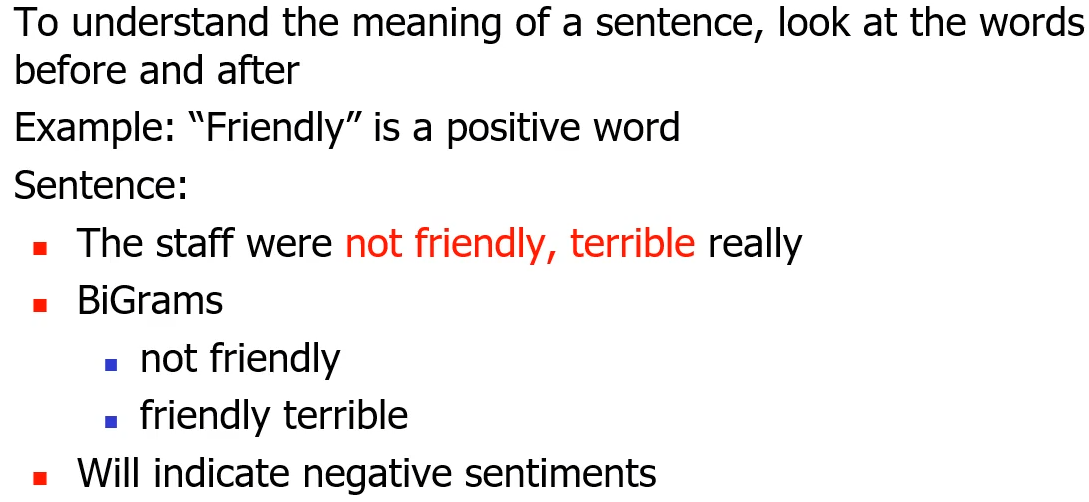

In [64]:
Image("../3. Images/bigrams2.png")

In [65]:
# Semantics using nGrams
s = "This is a sentence of seven words"
sBlob = TextBlob(s)
sBlob.ngrams(n = 3)

[WordList(['This', 'is', 'a']),
 WordList(['is', 'a', 'sentence']),
 WordList(['a', 'sentence', 'of']),
 WordList(['sentence', 'of', 'seven']),
 WordList(['of', 'seven', 'words'])]

In [66]:
l = blobTotal.ngrams(n = 3)
print(f"Number of bigrams: {len(l)}")
print(f"Total number of words: {len(blobTotal.words)}")

Number of bigrams: 36109
Total number of words: 36111


In [67]:
# First 5 ngrams
l[0:5]

[WordList(['\ufeffThe', 'Project', 'Gutenberg']),
 WordList(['Project', 'Gutenberg', 'eBook']),
 WordList(['Gutenberg', 'eBook', 'of']),
 WordList(['eBook', 'of', 'Hamlet']),
 WordList(['of', 'Hamlet', 'Prince'])]

In [68]:
count = 0
for l in blobTotal.ngrams(n = 2):
    print()
    print(l[0], l[1])
    print(l)
    print(count)
    count += 1
    if count == 5:
        break


﻿The Project
['\ufeffThe', 'Project']
0

Project Gutenberg
['Project', 'Gutenberg']
1

Gutenberg eBook
['Gutenberg', 'eBook']
2

eBook of
['eBook', 'of']
3

of Hamlet
['of', 'Hamlet']
4


In [69]:
# Count positive nGrams (Polarity > 0.9) in the first 20,000 words of Hamlet

text20000 = textTotal[0:20000]
blob20000 = TextBlob(text20000)

count = 0
for l in blob20000.ngrams(n = 10):
    if TextBlob(str(l)).sentiment.polarity > 0.9:
        print(l, TextBlob(str(l)).sentiment.polarity)
        count += 1

print()        
print(f"Number of positive nGrams: {count}")

['hour', 'Laertes', 'time', 'be', 'thine', 'And', 'thy', 'best', 'graces', 'spend'] 1.0
['Laertes', 'time', 'be', 'thine', 'And', 'thy', 'best', 'graces', 'spend', 'it'] 1.0
['time', 'be', 'thine', 'And', 'thy', 'best', 'graces', 'spend', 'it', 'at'] 1.0
['be', 'thine', 'And', 'thy', 'best', 'graces', 'spend', 'it', 'at', 'thy'] 1.0
['thine', 'And', 'thy', 'best', 'graces', 'spend', 'it', 'at', 'thy', 'will'] 1.0
['And', 'thy', 'best', 'graces', 'spend', 'it', 'at', 'thy', 'will', '30'] 1.0
['thy', 'best', 'graces', 'spend', 'it', 'at', 'thy', 'will', '30', 'But'] 1.0
['best', 'graces', 'spend', 'it', 'at', 'thy', 'will', '30', 'But', 'now'] 1.0
['not', 'to', 'Wittenberg', 'Ham', 'I', 'shall', 'in', 'all', 'my', 'best'] 1.0
['to', 'Wittenberg', 'Ham', 'I', 'shall', 'in', 'all', 'my', 'best', 'obey'] 1.0
['Wittenberg', 'Ham', 'I', 'shall', 'in', 'all', 'my', 'best', 'obey', 'you'] 1.0
['Ham', 'I', 'shall', 'in', 'all', 'my', 'best', 'obey', 'you', 'madam'] 1.0
['I', 'shall', 'in', 'all'

In [70]:
document = nlp('In 1994, Tim Berners-Lee founded the World Wide Web Consortium (W3C), devoted to developing web technologies')

for entity in document.ents:
    print(entity.text, ':', entity.label_)

1994 : DATE
Tim Berners-Lee : PERSON
the World Wide Web Consortium : WORK_OF_ART


In [71]:
document = nlp("Sid Chakravarty receives standing ovation at Emmy Awards")

for entity in document.ents:
    print(entity.text, ':', entity.label_)

Sid Chakravarty : PERSON
Emmy Awards : EVENT


In [72]:
# Similarity Detection using spaCy

document1 = nlp("I like cats")
document2 = nlp("I hate cats")

print(f"Similarity between '{document1}' and '{document2}': {document1.similarity(document2)}")

Similarity between 'I like cats' and 'I hate cats': 0.7395627937200857


C:\Users\Owner\AppData\Local\Temp\ipykernel_31916\2005925591.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(f"Similarity between '{document1}' and '{document2}': {document1.similarity(document2)}")


<h3 style = 'color:lightgreen'>1.2.5 Text Analysis using WordNet and Text-a-tistic (Stemming and Lemmatization)</h3>

<b>WordNet</b>:

<ul>
    <li>Stemming</li>
    <li>Lemmatization</li>
    <li>Synonyms</li>
    <li>Antonyms</li>
</ul>

<b>Text-a-tistic</b>:

<ul>
    <li>Readibility Index</li>
</ul>

WordNet is a lexical database of semantic relations between words in more than 200 languages. 

<b>Lemmatization</b>: A lemma is the base form of the word. It takes into consideration the morphological analysis of the word.

<b>Stemming</b>: From stem "produc-" we can create a word "product" or "productive" or "productivity" or "production". Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes. Stemming is also a part of queries and internet search engine. Stemming technique only looks at the form of the word where as lemmatization looks into the meaning of the word.

In [75]:
word1 = Word("varieties")
print(word1.stem())
print(word1.lemmatize())

varieti
variety


In [76]:
word1 = Word("strawberries")
print(word1.stem())
print(word1.lemmatize())

strawberri
strawberry


<b>Synonym</b> is a word or a phrase that means exactly or nearly the same as another word or phrase in the same language. E.g., shut is a synonym of close. <b>Antonym</b> is a word that has the opposite meaning. E.g., good is an antonym of bad.

<b>Hyponym</b> is a word of more specific meaning than a general or superordinat term applicable to it. E.g., spoon is a hyponym of cutlery and animal is a hypony of a bird. <b>Meronym</b> is a term which denotes part of something, but which is used to refer the whole of it. E.g., faces when used to mean people.

In [77]:
# Synonyms and Antonyms
happy = Word("happy")
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [78]:
# Synonyms

happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [79]:
synonyms = set()
for synset in happy.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())

synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

In [80]:
# Antonyms

lemmas = happy.synsets[0].lemmas()
lemmas

lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

In [83]:
# Text-a-tistic is used to determine readibility of a text. It is used in school
# Text readibility is affected by
# - Sentence Structure
# - Sentence length
# - Vocabulary
# - Topic

readibility = Textatistic(textTotal)

In [86]:
readibility.dict()

{'char_count': 171316,
 'word_count': 35344,
 'sent_count': 3945,
 'sybl_count': 44574,
 'notdalechall_count': 9485,
 'polysyblword_count': 1675,
 'flesch_score': 91.0483382142761,
 'fleschkincaid_score': 2.7856250716477877,
 'gunningfog_score': 5.479329680802294,
 'smog_score': 6.8515496973161945,
 'dalechall_score': 8.318317765435328}

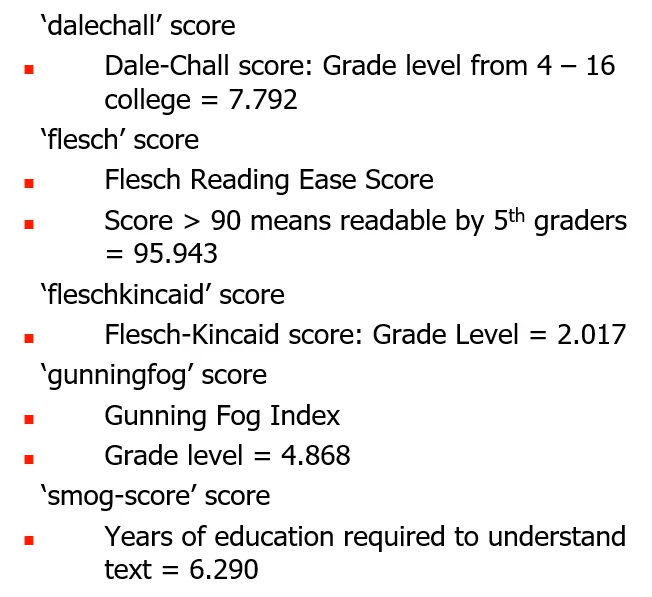

In [87]:
Image('../3. Images/Textatistic.png')